In [1]:
import wandb
from wandb.keras import WandbCallback
wandb.init(project="RNN seq 128.")

wandb: Currently logged in as: jintae. Use `wandb login --relogin` to force relogin


In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/PARK/Desktop/Alcohol_Sales.csv')
print(df.head())

   DATE  Sales
0     0   3459
1     1   3458
2     2   4002
3     3   4564
4     4   4221


In [3]:
df.shape

(325, 2)

In [4]:
import numpy as np

data = df.to_numpy()

In [5]:
data.shape

(325, 2)

In [6]:
data[0:5]

array([[   0, 3459],
       [   1, 3458],
       [   2, 4002],
       [   3, 4564],
       [   4, 4221]], dtype=int64)

In [7]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# data = scaler.fit_transform(data)

In [8]:
data_mean = data.mean()
data_std = data.std()

data = (data - data_mean)/data_std

In [9]:
data[0:5]

array([[-0.9194862 , -0.12914209],
       [-0.91925771, -0.12937058],
       [-0.91902922, -0.00507246],
       [-0.91880073,  0.12333846],
       [-0.91857224,  0.04496667]])

In [10]:
train_input = []
train_label = []

data_len = 325
time_step = 100
out_dim = 25

for i in range(176):
    _input = data[i:i+time_step]
    _label = data[i+time_step:i+time_step+out_dim]
    
    train_input.append(_input)
    train_label.append(_label)
    

train_input = np.array(train_input)
train_label = np.array(train_label)
train_label = np.delete(train_label, 0, axis=2)


test_input = np.array(data[data_len-out_dim-time_step:data_len-out_dim])
test_label =np.array(data[300:325])
test_label = np.delete(test_label, 0, axis=1)

In [11]:
train_input.shape

(176, 100, 2)

In [12]:
train_label.shape

(176, 25, 1)

In [13]:
test_input.shape

(100, 2)

In [14]:
test_label.shape

(25, 1)

In [15]:
np.random.seed(10)
shuffled_indices = np.random.permutation(np.arange(train_input.shape[0]))
train_input = train_input[shuffled_indices, :, :]
train_label = train_label[shuffled_indices, :]

In [16]:
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.SimpleRNN(128, input_shape=(time_step,2)))
model.add(layers.Dense(25))

model.summary()

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(train_input, train_label, epochs=50, verbose=1, shuffle=True, validation_split=0.20,
                   callbacks=[WandbCallback(log_weights=True, log_gradients=True, training_data=(train_input, train_label))])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16768     
                                                                 
 dense (Dense)               (None, 25)                3225      
                                                                 
Total params: 19,993
Trainable params: 19,993
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/50
4/5 [=======================>......] - ETA: 0s - loss: 1.4503 - mae: 1.0467INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 4s 642ms/step - loss: 1.3872 - mae: 1.0155 - val_loss: 0.7864 - val_mae: 0.7257
Epoch 2/50
5/5 [==============================] - ETA: 0s - loss: 0.5870 - mae: 0.6082INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 469ms/step - loss: 0.5870 - mae: 0.6082 - val_loss: 0.2851 - val_mae: 0.4154
Epoch 3/50
5/5 [==============================] - ETA: 0s - loss: 0.2280 - mae: 0.3767INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 474ms/step - loss: 0.2280 - mae: 0.3767 - val_loss: 0.1635 - val_mae: 0.3295
Epoch 4/50
5/5 [==============================] - ETA: 0s - loss: 0.1574 - mae: 0.3226INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.1574 - mae: 0.3226 - val_loss: 0.1295 - val_mae: 0.2894
Epoch 5/50
5/5 [==============================] - 1s 162ms/step - loss: 0.1496 - mae: 0.3122 - val_loss: 0.2870 - val_mae: 0.4462
Epoch 6/50
5/5 [==============================] - 1s 153ms/step - loss: 0.2437 - mae: 0.4064 - val_loss: 0.1657 - val_mae: 0.3323
Epoch 7/50
5/5 [==============================] - 1s 140ms/step - loss: 0.1610 - mae: 0.3262 - val_loss: 0.1599 - val_mae: 0.3252
Epoch 8/50
5/5 [==============================] - 1s 139ms/step - loss: 0.1614 - mae: 0.3260 - val_loss: 0.1452 - val_mae: 0.3140
Epoch 9/50
5/5 [==============================] - 1s 156ms/step - loss: 0.1452 - mae: 0.3118 - val_loss: 0.1405 - val_mae: 0.3083
Epoch 10/50
5/5 [==============================] - ETA: 0s - loss: 0.1341 - mae: 0.2990INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\ass

wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 472ms/step - loss: 0.1341 - mae: 0.2990 - val_loss: 0.1252 - val_mae: 0.2899
Epoch 11/50
5/5 [==============================] - ETA: 0s - loss: 0.1185 - mae: 0.2804INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.1185 - mae: 0.2804 - val_loss: 0.1006 - val_mae: 0.2579
Epoch 12/50
5/5 [==============================] - ETA: 0s - loss: 0.0967 - mae: 0.2492INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 500ms/step - loss: 0.0967 - mae: 0.2492 - val_loss: 0.0809 - val_mae: 0.2259
Epoch 13/50
5/5 [==============================] - ETA: 0s - loss: 0.0804 - mae: 0.2245INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 498ms/step - loss: 0.0804 - mae: 0.2245 - val_loss: 0.0744 - val_mae: 0.2135
Epoch 14/50
5/5 [==============================] - ETA: 0s - loss: 0.0771 - mae: 0.2186INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 505ms/step - loss: 0.0771 - mae: 0.2186 - val_loss: 0.0698 - val_mae: 0.2084
Epoch 15/50
5/5 [==============================] - ETA: 0s - loss: 0.0702 - mae: 0.2090INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 493ms/step - loss: 0.0702 - mae: 0.2090 - val_loss: 0.0651 - val_mae: 0.2001
Epoch 16/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0682 - mae: 0.2066 - val_loss: 0.0678 - val_mae: 0.2024
Epoch 17/50
5/5 [==============================] - ETA: 0s - loss: 0.0661 - mae: 0.2010INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 482ms/step - loss: 0.0661 - mae: 0.2010 - val_loss: 0.0605 - val_mae: 0.1929
Epoch 18/50
5/5 [==============================] - ETA: 0s - loss: 0.0620 - mae: 0.1937INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 508ms/step - loss: 0.0620 - mae: 0.1937 - val_loss: 0.0588 - val_mae: 0.1879
Epoch 19/50
5/5 [==============================] - ETA: 0s - loss: 0.0608 - mae: 0.1923INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 519ms/step - loss: 0.0608 - mae: 0.1923 - val_loss: 0.0582 - val_mae: 0.1868
Epoch 20/50
5/5 [==============================] - ETA: 0s - loss: 0.0585 - mae: 0.1868INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0585 - mae: 0.1868 - val_loss: 0.0572 - val_mae: 0.1833
Epoch 21/50
5/5 [==============================] - ETA: 0s - loss: 0.0578 - mae: 0.1855INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 506ms/step - loss: 0.0578 - mae: 0.1855 - val_loss: 0.0559 - val_mae: 0.1797
Epoch 22/50
5/5 [==============================] - 1s 158ms/step - loss: 0.0575 - mae: 0.1846 - val_loss: 0.0569 - val_mae: 0.1810
Epoch 23/50
5/5 [==============================] - 1s 148ms/step - loss: 0.0579 - mae: 0.1845 - val_loss: 0.0568 - val_mae: 0.1856
Epoch 24/50
5/5 [==============================] - 1s 149ms/step - loss: 0.0585 - mae: 0.1859 - val_loss: 0.0571 - val_mae: 0.1863
Epoch 25/50
5/5 [==============================] - ETA: 0s - loss: 0.0564 - mae: 0.1833INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 469ms/step - loss: 0.0564 - mae: 0.1833 - val_loss: 0.0553 - val_mae: 0.1799
Epoch 26/50
5/5 [==============================] - 1s 156ms/step - loss: 0.0558 - mae: 0.1829 - val_loss: 0.0591 - val_mae: 0.1847
Epoch 27/50
5/5 [==============================] - ETA: 0s - loss: 0.0568 - mae: 0.1844INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 497ms/step - loss: 0.0568 - mae: 0.1844 - val_loss: 0.0547 - val_mae: 0.1782
Epoch 28/50
5/5 [==============================] - 1s 168ms/step - loss: 0.0570 - mae: 0.1830 - val_loss: 0.0562 - val_mae: 0.1858
Epoch 29/50
5/5 [==============================] - 1s 153ms/step - loss: 0.0557 - mae: 0.1814 - val_loss: 0.0550 - val_mae: 0.1827
Epoch 30/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0559 - mae: 0.1835 - val_loss: 0.0554 - val_mae: 0.1786
Epoch 31/50
5/5 [==============================] - ETA: 0s - loss: 0.0543 - mae: 0.1792INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 481ms/step - loss: 0.0543 - mae: 0.1792 - val_loss: 0.0537 - val_mae: 0.1766
Epoch 32/50
5/5 [==============================] - ETA: 0s - loss: 0.0530 - mae: 0.1766INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.0530 - mae: 0.1766 - val_loss: 0.0519 - val_mae: 0.1748
Epoch 33/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0527 - mae: 0.1760 - val_loss: 0.0520 - val_mae: 0.1761
Epoch 34/50
5/5 [==============================] - ETA: 0s - loss: 0.0519 - mae: 0.1742INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 502ms/step - loss: 0.0519 - mae: 0.1742 - val_loss: 0.0513 - val_mae: 0.1738
Epoch 35/50
5/5 [==============================] - 1s 172ms/step - loss: 0.0510 - mae: 0.1734 - val_loss: 0.0519 - val_mae: 0.1738
Epoch 36/50
5/5 [==============================] - ETA: 0s - loss: 0.0508 - mae: 0.1733INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 481ms/step - loss: 0.0508 - mae: 0.1733 - val_loss: 0.0512 - val_mae: 0.1719
Epoch 37/50
5/5 [==============================] - ETA: 0s - loss: 0.0502 - mae: 0.1710INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 501ms/step - loss: 0.0502 - mae: 0.1710 - val_loss: 0.0505 - val_mae: 0.1724
Epoch 38/50
5/5 [==============================] - ETA: 0s - loss: 0.0495 - mae: 0.1701INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 488ms/step - loss: 0.0495 - mae: 0.1701 - val_loss: 0.0494 - val_mae: 0.1698
Epoch 39/50
5/5 [==============================] - 1s 151ms/step - loss: 0.0487 - mae: 0.1687 - val_loss: 0.0507 - val_mae: 0.1760
Epoch 40/50
5/5 [==============================] - ETA: 0s - loss: 0.0496 - mae: 0.1714INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 508ms/step - loss: 0.0496 - mae: 0.1714 - val_loss: 0.0494 - val_mae: 0.1722
Epoch 41/50
5/5 [==============================] - ETA: 0s - loss: 0.0484 - mae: 0.1700INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 499ms/step - loss: 0.0484 - mae: 0.1700 - val_loss: 0.0486 - val_mae: 0.1683
Epoch 42/50
5/5 [==============================] - ETA: 0s - loss: 0.0471 - mae: 0.1672INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 507ms/step - loss: 0.0471 - mae: 0.1672 - val_loss: 0.0481 - val_mae: 0.1667
Epoch 43/50
5/5 [==============================] - ETA: 0s - loss: 0.0468 - mae: 0.1663INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 494ms/step - loss: 0.0468 - mae: 0.1663 - val_loss: 0.0466 - val_mae: 0.1659
Epoch 44/50
5/5 [==============================] - ETA: 0s - loss: 0.0457 - mae: 0.1635INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 484ms/step - loss: 0.0457 - mae: 0.1635 - val_loss: 0.0461 - val_mae: 0.1646
Epoch 45/50
5/5 [==============================] - ETA: 0s - loss: 0.0448 - mae: 0.1622INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 489ms/step - loss: 0.0448 - mae: 0.1622 - val_loss: 0.0455 - val_mae: 0.1625
Epoch 46/50
5/5 [==============================] - ETA: 0s - loss: 0.0443 - mae: 0.1621INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 537ms/step - loss: 0.0443 - mae: 0.1621 - val_loss: 0.0448 - val_mae: 0.1632
Epoch 47/50
4/5 [=======================>......] - ETA: 0s - loss: 0.0437 - mae: 0.1606INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 479ms/step - loss: 0.0433 - mae: 0.1600 - val_loss: 0.0441 - val_mae: 0.1614
Epoch 48/50
5/5 [==============================] - ETA: 0s - loss: 0.0425 - mae: 0.1582INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 512ms/step - loss: 0.0425 - mae: 0.1582 - val_loss: 0.0436 - val_mae: 0.1596
Epoch 49/50
4/5 [=======================>......] - ETA: 0s - loss: 0.0415 - mae: 0.1559INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 512ms/step - loss: 0.0414 - mae: 0.1557 - val_loss: 0.0423 - val_mae: 0.1572
Epoch 50/50
5/5 [==============================] - ETA: 0s - loss: 0.0406 - mae: 0.1539INFO:tensorflow:Assets written to: C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best\assets


wandb: Adding directory to artifact (C:\Users\PARK\Documents\LAB\RNN vs LSTM\FInal Example\wandb\run-20221015_182523-2kqpe77u\files\model-best)... Done. 0.0s


5/5 [==============================] - 2s 506ms/step - loss: 0.0406 - mae: 0.1539 - val_loss: 0.0416 - val_mae: 0.1562


In [17]:
test_input = test_input.reshape(1, test_input.shape[0], test_input.shape[1])

y_hat = model.predict(test_input)

1/1 [==============================] - 0s 100ms/step


In [18]:
test_input.shape

(1, 100, 2)

In [19]:
test_label = test_label.reshape(1, test_label.shape[0], test_label.shape[1])

In [20]:
test_label.shape

(1, 25, 1)

In [21]:
y_hat

array([[1.8035214, 1.8259015, 1.5736339, 1.6740216, 1.6803879, 1.7395583,
        1.8078129, 1.9143829, 1.9284588, 1.9355786, 2.0353582, 1.8530284,
        1.6889215, 1.8141012, 1.7258766, 1.708596 , 1.6881948, 1.9751914,
        1.8512892, 1.9929297, 1.887569 , 1.815453 , 2.019549 , 1.8923368,
        1.9742892]], dtype=float32)

In [22]:
y_hat.shape

(1, 25)

In [23]:
y_hat = y_hat.reshape(y_hat.shape[1], 1)

In [24]:
y_hat = (y_hat*data_std)+data_mean

In [25]:
#print(scaler.data_max_)

In [26]:
#print(scaler.data_min_)

In [27]:
#y_hat = y_hat * (scaler.data_max_[1]-scaler.data_min_[1]) + scaler.data_min_[1]

Text(0.5, 1.0, 'RNN prediction')

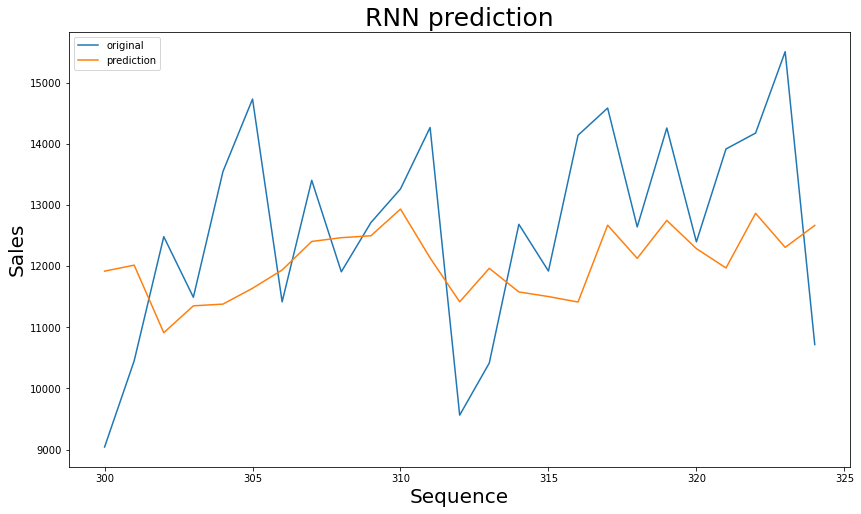

In [28]:
import matplotlib.pyplot as plt

x = range(325)
plt.figure(figsize=(14,8))
plt.plot(df[300:325]['Sales'], label='original')
plt.plot(x[300:325], y_hat, label='prediction')
plt.legend()
plt.xlabel('Sequence', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('RNN prediction', fontsize=25)

In [29]:
model.evaluate(test_input, test_label)

1/1 [==============================] - 0s 22ms/step - loss: 0.1548 - mae: 0.3314


[0.15476621687412262, 0.331368088722229]